<a href="https://colab.research.google.com/github/Rifadsyahr/Data_Analys_Dept.HR/blob/main/Dept_HR_Rizki_Fadhilah_Syahni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 6>DEPARTEMENT HUMAN RESOURCE </font></h1>


Created by : Rizki Fadhilah Syahni (DBA2121102)


*Dataset Utama (Primary Dataset)*

  | **DATA DICTIONARY TABLE EMPLOYEES**      |                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| First_Name            | Nama Depan Pegawai                                                                                      |
| Last_Name          | Nama Belakang pegawai                                                                                         |
| Age         | Usia Pegawai                                                                                  |
| Length_service      | Lama Pegawai Bekerja diperusahaan The Looker (Tahun)                                                                                         |
| Absent_Hours     | Lama Absen Dalam Satu Tahun (Jam)                                                                                          |
| Distribution_Centers_ID   | Distribution Centers ID                                                                                  |



*Dataset Pendukung (Secondary Dataset)*

  | **DATA DICTIONARY TABLE Distribution_Centers**      |                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| ID            | ID Distribution Centers                                                                                     |
| Name          | Nama Distribution Centers                                                                                       |
| Latitude         | Titik Koordinat Latitude                                                                                  |
| Longitude      | Titik Koordinat Longitude                                                                                          |

## Data Understanding

### Import Libraries

In [ ]:
import pandas as pd #Data Manipulating
import numpy as np #Support large multi dimentional array
import matplotlib.pyplot as plt #Basic plot Python
import seaborn as sns  #alternative plot from matplotlib but with some different feature
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Import Data 

In [ ]:
# Import dataset yang telah difilter dan dijoin di PostgreSQL 
hr = pd.read_csv('/content/drive/MyDrive/Final_Project/hr_final.csv')

In [ ]:
# Jumlah Kolom dan Baris pada tabel HR
hr.shape

(8336, 9)

In [ ]:
# Data pada tabel HR
hr.columns

Index(['first_name', 'gender', 'age', 'length_service', 'absent_hours', 'id',
       'name', 'latitude', 'longitude'],
      dtype='object')

In [ ]:
# Informasi terkait tabel HR
hr.info

<bound method DataFrame.info of      first_name gender        age  length_service  absent_hours  id  \
0     Gutierrez      F  32.028816        6.018478     36.577306   5   
1      Hardwick      M  40.320902        5.532445     30.165072   9   
2       Delgado      M  48.822047        4.389973     83.807798  10   
3         Simon      F  44.599357        3.081736     70.020165   2   
4      Delvalle      M  35.697876        3.619091      0.000000   4   
...         ...    ...        ...             ...           ...  ..   
8331   Coniglio      F  46.057544        4.838288     93.665111   9   
8332        Cox      M  34.455490        2.427274      0.000000   1   
8333    Hawkins      F  58.347160        4.009393    176.356940   9   
8334    Proctor      F  43.340616        6.154837     60.321917   7   
8335     Salter      M  46.192782        5.174722    112.023389   2   

                 name  latitude  longitude  
0      New Orleans LA   29.9500   -90.0667  
1       Charleston SC   3

### Data Missing Value
 

In [ ]:
## Cek Data Null HR
hr.isna().any()

first_name        False
gender            False
age               False
length_service    False
absent_hours      False
id                False
name              False
latitude          False
longitude         False
dtype: bool

### Transformasi Data


In [ ]:
# merubah tipe data menjadi tipe data yang sesuai, misalnya age, length_service dan absent hours diubah jadi angka yang dibulatkan pake fungsi round dan diubah jadi integer
#hr['age'] =  hr['age'].round().astype("int64")
#hr['length_service'] =  hr['length_service'].round().astype("int64")
#hr['absent_hours'] =  hr['absent_hours'].round().astype("int64")
#hr

In [ ]:
# cek data duplikat atau tidak
hr.duplicated().any()

False

## Data Exploration


In [ ]:
#memperlihatkan n baris awal dari sebuah pandas dataframe (default n = 5)
hr.head() 

,first_name,gender,age,length_service,absent_hours,id,name,latitude,longitude
0,Gutierrez,F,32.028816,6.018478,36.577306,5,New Orleans LA,29.9500,-90.0667
1,Hardwick,M,40.320902,5.532445,30.165072,9,Charleston SC,32.7833,-79.9333
2,Delgado,M,48.822047,4.389973,83.807798,10,Savannah GA,32.0167,-81.1167
3,Simon,F,44.599357,3.081736,70.020165,2,Chicago IL,41.8369,-87.6847
4,Delvalle,M,35.697876,3.619091,0.000000,4,Los Angeles CA,34.0500,-118.2500


In [ ]:
#memperlihatkan n baris akhir dari sebuah pandas dataframe (default n = 5)
hr.tail() 

,first_name,gender,age,length_service,absent_hours,id,name,latitude,longitude
8331,Coniglio,F,46.057544,4.838288,93.665111,9,Charleston SC,32.7833,-79.9333
8332,Cox,M,34.455490,2.427274,0.000000,1,Memphis TN,35.1174,-89.9711
8333,Hawkins,F,58.347160,4.009393,176.356940,9,Charleston SC,32.7833,-79.9333
8334,Proctor,F,43.340616,6.154837,60.321917,7,Philadelphia PA,39.9500,-75.1667
8335,Salter,M,46.192782,5.174722,112.023389,2,Chicago IL,41.8369,-87.6847


In [ ]:
# Sampel Data 15 
hr.sample(15)

,first_name,gender,age,length_service,absent_hours,id,name,latitude,longitude
3994,Lynch,F,41.850737,4.908536,44.074989,7,Philadelphia PA,39.9500,-75.1667
77,Smith,M,35.493900,8.348239,44.974112,5,New Orleans LA,29.9500,-90.0667
1981,Wade,F,62.164094,6.679194,198.541746,9,Charleston SC,32.7833,-79.9333
1835,Gonzales,M,42.793973,4.012557,44.545204,8,Mobile AL,30.6944,-88.0431
7901,Pugh,M,45.774032,4.281190,13.915813,7,Philadelphia PA,39.9500,-75.1667
4966,Pierce,M,37.592669,3.800093,29.073974,10,Savannah GA,32.0167,-81.1167
3798,Wetter,M,41.683684,6.413100,33.370400,2,Chicago IL,41.8369,-87.6847
1335,Snow,F,40.768563,2.674609,33.137001,5,New Orleans LA,29.9500,-90.0667
1164,Figueiredo,M,45.027112,5.955614,65.672312,1,Memphis TN,35.1174,-89.9711
6051,Tatum,M,40.974454,4.672747,102.176436,2,Chicago IL,41.8369,-87.6847


In [ ]:
# Hanya Melihat Tabel Data Numerical 
hr.select_dtypes("number").columns.to_list()

['age', 'length_service', 'absent_hours', 'id', 'latitude', 'longitude']

In [ ]:
# Hanya Melihat Tabel Data Category
hr.select_dtypes("object").columns.to_list()

['first_name', 'gender', 'name']

In [ ]:
#menentukan variabel yang akan digunakan dengan difilter kembali datasetnya agar lebih ringkas.
#merename kolom 'name' menjadi 'placement' agar lebih cocok.

hr_filtered = hr[['first_name','age', 'length_service', 'absent_hours', 'id', 'name']]
hr_filtered.rename(columns={'first_name':'employee'}, inplace=True)
hr_filtered.rename(columns={'name':'placement'}, inplace=True)
hr_filtered.rename(columns={'id':'placement_id'}, inplace=True)
hr_filtered

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,employee,age,length_service,absent_hours,placement_id,placement
0,Gutierrez,32.028816,6.018478,36.577306,5,New Orleans LA
1,Hardwick,40.320902,5.532445,30.165072,9,Charleston SC
2,Delgado,48.822047,4.389973,83.807798,10,Savannah GA
3,Simon,44.599357,3.081736,70.020165,2,Chicago IL
4,Delvalle,35.697876,3.619091,0.000000,4,Los Angeles CA
...,...,...,...,...,...,...
8331,Coniglio,46.057544,4.838288,93.665111,9,Charleston SC
8332,Cox,34.455490,2.427274,0.000000,1,Memphis TN
8333,Hawkins,58.347160,4.009393,176.356940,9,Charleston SC
8334,Proctor,43.340616,6.154837,60.321917,7,Philadelphia PA


In [ ]:
# Hapus kolom 
del hr_filtered ['placement_id']

In [ ]:
# Mengecek Data Missing Values
hr_filtered.isna().sum()

employee          0
age               0
length_service    0
absent_hours      0
placement         0
dtype: int64

In [ ]:
# Deskripsi Data Numerical di HR
hr_filtered.describe()

,age,length_service,absent_hours
count,8336.000000,8336.000000,8336.000000
mean,42.007086,4.782910,61.283978
std,9.939798,2.462990,49.038365
min,3.504743,0.012098,0.000000
25%,35.298748,3.575892,19.127590
50%,42.114924,4.600248,56.005808
75%,48.666943,5.623922,94.284692
max,77.938003,43.735239,272.530123


Mean -> memperlihatkan rata-rata dari data

---


Median -> memperlihatkan nilai tengah data

---


Standard deviation -> variasi data terhadap mean, kecil = data dekat dengan mean


---




IQR -> untuk melihat adanya outliers




In [ ]:
hr_filtered[hr_filtered['age']==17]

,employee,age,length_service,absent_hours,placement


In [ ]:
hr_filtered.duplicated().any()

False

In [ ]:
hr_filtered.isna().any()

employee          False
age               False
length_service    False
absent_hours      False
placement         False
dtype: bool

# Visualisasi

### Visualisasi Variabel

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


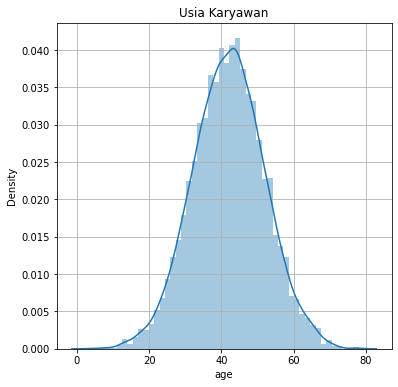

In [ ]:
#1 Usia Karyawan
plt.figure(figsize=(6,6))
plt.title('Usia Karyawan')
plt.grid()
sns.distplot(hr_filtered['age'])

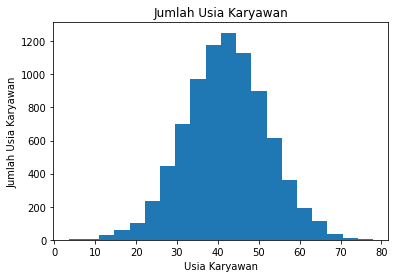

In [ ]:
plt.hist(hr_filtered['age'],bins = 20)
plt.title("Jumlah Usia Karyawan")
plt.xlabel("Usia Karyawan")
plt.ylabel("Jumlah Usia Karyawan")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


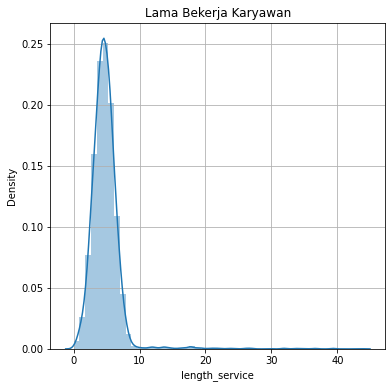

In [ ]:
#2 Lama bekerja Karyawan
plt.figure(figsize=(6,6))
plt.title('Lama Bekerja Karyawan')
plt.grid()
sns.distplot(hr_filtered['length_service'])

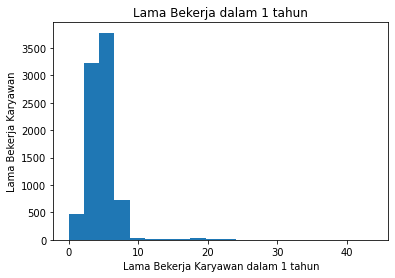

In [ ]:
plt.hist(hr_filtered['length_service'],bins = 20)
plt.title("Lama Bekerja dalam 1 tahun")
plt.xlabel("Lama Bekerja Karyawan dalam 1 tahun")
plt.ylabel("Lama Bekerja Karyawan")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


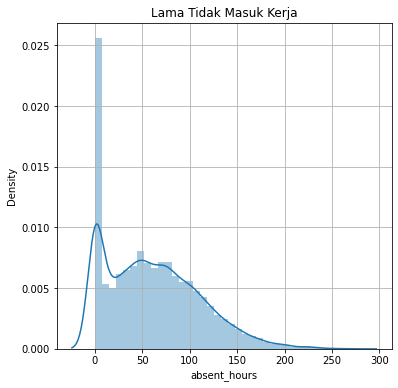

In [ ]:
#2 Lama Tidak Masuk Kerja
plt.figure(figsize=(6,6))
plt.title('Lama Tidak Masuk Kerja')
plt.grid()
sns.distplot(hr_filtered['absent_hours'])

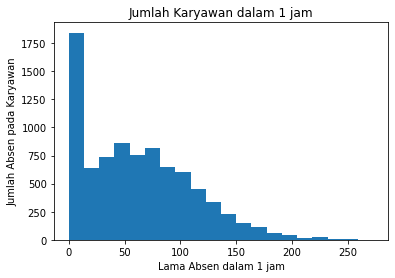

In [ ]:
plt.hist(hr_filtered['absent_hours'],bins = 20)
plt.title("Jumlah Karyawan dalam 1 jam")
plt.xlabel("Lama Absen dalam 1 jam")
plt.ylabel("Jumlah Absen pada Karyawan")
plt.show()

### Cek Outlier


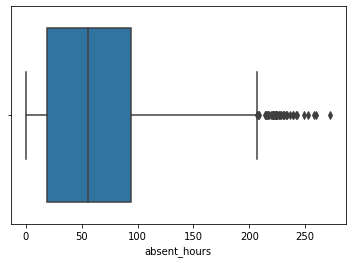

In [ ]:
# cek outliers
sns.boxplot(x=hr['absent_hours']) 
#hr[['absent_hours']].boxplot()

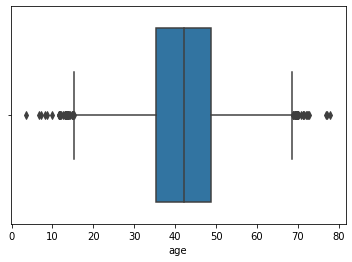

In [ ]:
# cek outliers
sns.boxplot(x=hr['age']) 

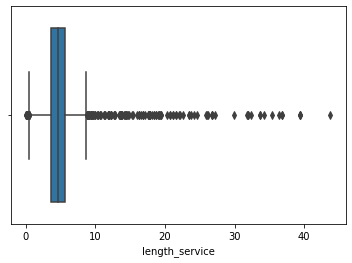

In [ ]:
# cek outliers
sns.boxplot(x=hr['length_service']) 

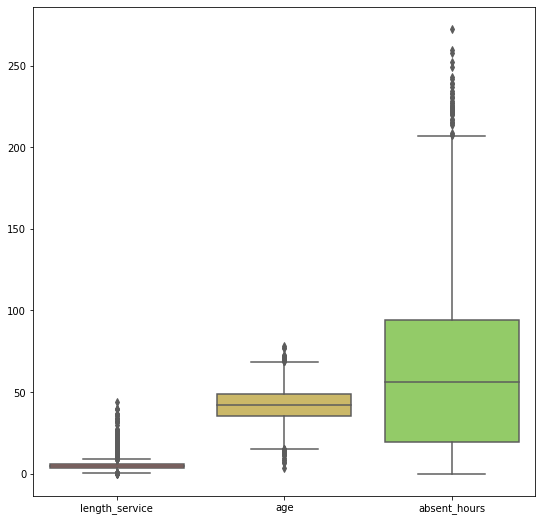

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
sns.boxplot(data=hr_filtered[['length_service','age', 'absent_hours']], palette=('#db5f57', '#dbc257', '#91db57', '#57d3db'))

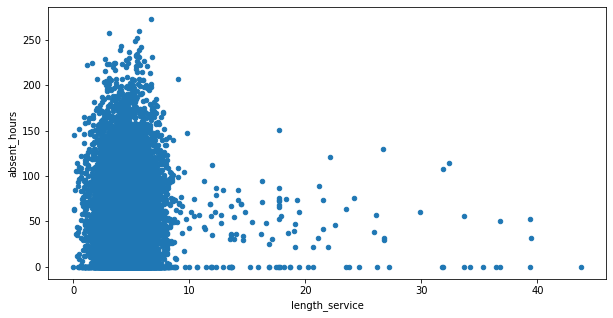

In [ ]:
#memvisualisasikan dataset untuk mengidentifikasi outliers dalam bentuk scatterplot.

hr_filtered[['length_service','absent_hours']].plot(kind='scatter', x='length_service', y='absent_hours', figsize=(10, 5))

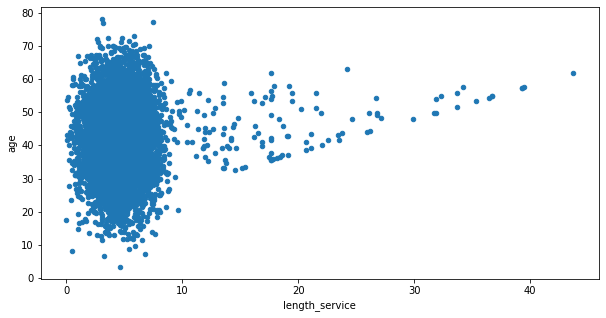

In [ ]:
#memvisualisasikan dataset untuk mengidentifikasi outliers dalam bentuk scatterplot.

hr_filtered[['length_service','age']].plot(kind='scatter', x='length_service', y='age', figsize=(10, 5))

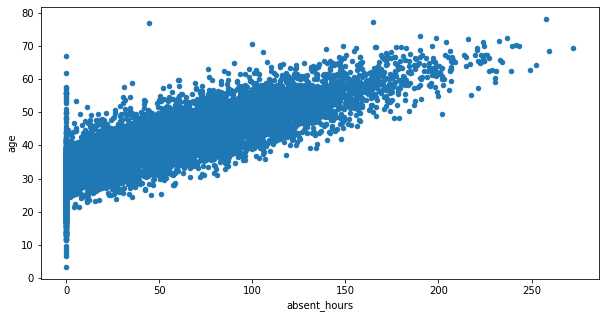

In [ ]:
#memvisualisasikan dataset untuk mengidentifikasi outliers dalam bentuk scatterplot.

hr_filtered[['absent_hours','age']].plot(kind='scatter', x='absent_hours', y='age', figsize=(10, 5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


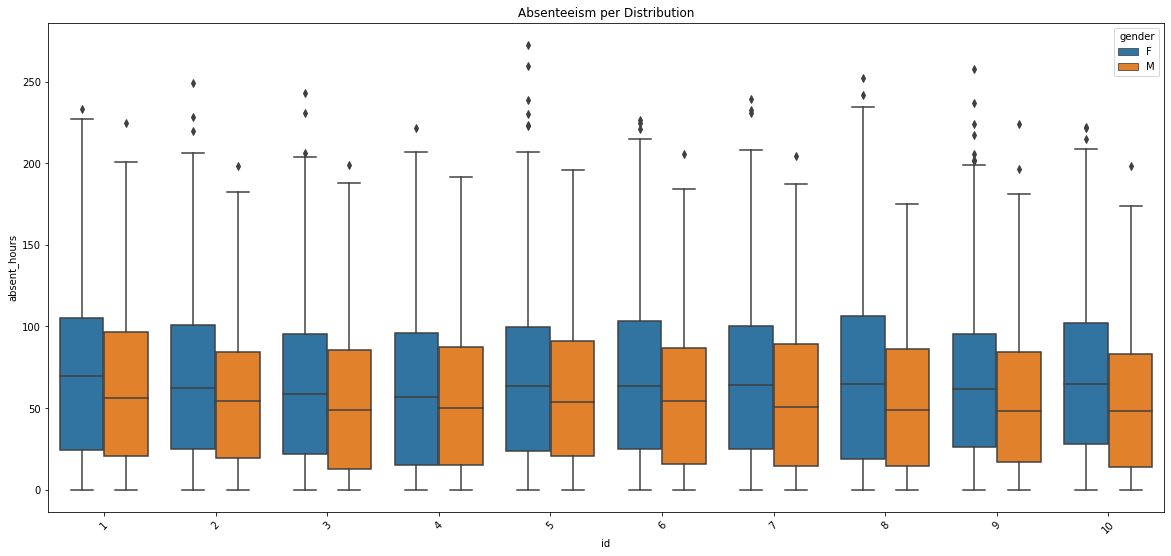

In [ ]:
# Visualisasi per distribusi berdasarkan absen pada gender
plt.figure(figsize=(20, 9))
sns.boxplot("id", "absent_hours", hue="gender", data=hr)
plt.xticks(rotation = 45)
plt.title('Absenteeism per Distribution');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


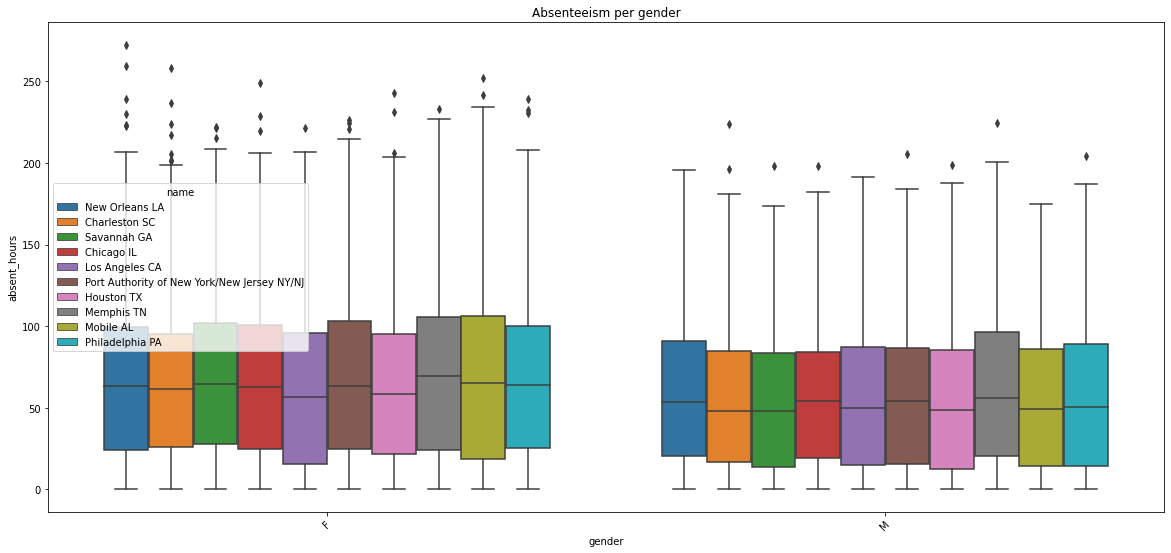

In [ ]:
plt.figure(figsize=(20, 9))
sns.boxplot("gender", "absent_hours", hue="name", data=hr)
plt.xticks(rotation = 45)
plt.title('Absenteeism per gender');

### IQR


In [ ]:
#Menghitung IQR age.

Q1_age = hr_filtered.age.quantile(0.25)
Q3_age = hr_filtered.age.quantile(0.75)
IQR_age = Q3_age-Q1_age
IQR_age

13.368194912499995

In [ ]:
#Mendefinisikan outliers 'age'

min_age = hr_filtered.age.quantile(0.035)
max_age = hr_filtered.age.quantile(0.99)
min_age, max_age

(23.96168009, 65.28594438399999)

In [ ]:
#Menghitung IQR length_service.

Q1_length = hr_filtered.length_service.quantile(0.25)
Q3_length = hr_filtered.length_service.quantile(0.75)
IQR_length = Q3_length-Q1_length
IQR_length

2.04802997

In [ ]:
#Mendefinisikan outliers 'length_service'

min_length = Q1_length - 1.5*IQR_length
max_length = Q3_length + 1.5*IQR_length
min_length, max_length

(0.5038469635, 8.695966843499999)

In [ ]:
#Menghitung IQR absent_hours.

Q1_absent = hr_filtered.absent_hours.quantile(0.25)
Q3_absent = hr_filtered.absent_hours.quantile(0.75)
IQR_absent = Q3_absent-Q1_absent
IQR_absent

75.15710185

In [ ]:
#Mendefinisikan outliers 'length_service'

min_absent= hr_filtered.absent_hours.quantile(0.24)
max_absent = hr_filtered.absent_hours.quantile(0.985)
min_absent, max_absent

(17.155704913999998, 182.70385920500007)

In [ ]:
hr_filtered_2 = hr_filtered[(hr_filtered.length_service<max_length) & (hr_filtered.length_service>min_length)]
hr_filtered_3 = hr_filtered_2[(hr_filtered.absent_hours<max_absent) & (hr_filtered.absent_hours>min_absent)]
hr_clean = hr_filtered_3[(hr_filtered.age<max_age) & (hr_filtered.age>=min_age)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


###Korelasi 

In [ ]:
hr_filtered.corr()['absent_hours'].sort_values()

length_service   -0.044202
age               0.830234
absent_hours      1.000000
Name: absent_hours, dtype: float64

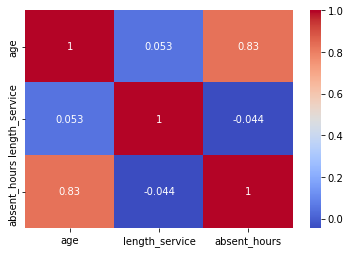

In [ ]:
# cek korelasi, berarti kolom age dan absent hours berkorelasi
corrMatrix = hr_filtered.corr()
sns.heatmap(corrMatrix, annot = True, cmap = 'coolwarm')

## Handling Outlier

In [ ]:
#Handling outliers.

def outlier(hr, ft):
  Q1 = hr[ft].quantile(0.25)
  Q3 = hr[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = hr_filtered.index[ (hr_filtered[ft] < lower_bound) | (hr_filtered[ft] > upper_bound)]

  return ls

In [ ]:
#Handling outliers.

index_list = []
for feature in ['absent_hours', 'length_service', 'age']:
  index_list.extend(outlier(hr_filtered, feature))

In [ ]:
#Handling outliers.

def remove(hr_filtered, ls):
  ls = sorted(set(ls))
  hr_filtered = hr_filtered.drop(ls)
  return hr_filtered

In [ ]:
#Handling outliers.

hr_clean = remove(hr_filtered, index_list)

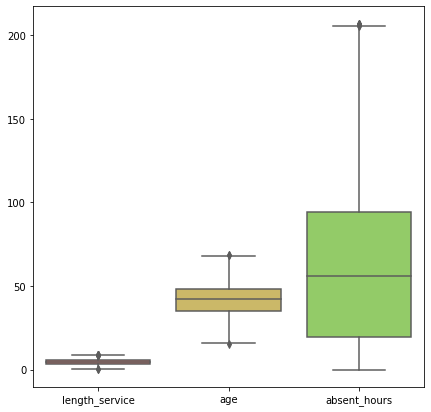

In [ ]:
#Visualisasi boxplot setelah handling outliers.

fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=hr_clean[['length_service','age', 'absent_hours']], palette=('#db5f57', '#dbc257', '#91db57', '#57d3db'))

In [ ]:
#Descriptive Statisics dataframe baru

hr_clean.describe()

,age,length_service,absent_hours
count,8077.000000,8077.000000,8077.000000
mean,41.892540,4.571656,60.793529
std,9.559347,1.463967,47.434967
min,15.369733,0.508195,0.000000
25%,35.257140,3.565788,19.741507
50%,42.012243,4.571825,56.195872
75%,48.484542,5.559828,94.037545
max,68.492142,8.674857,207.011745


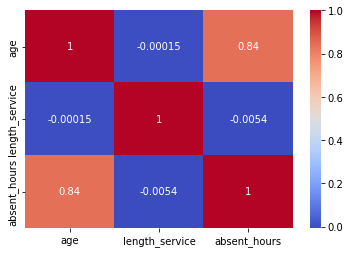

In [ ]:
# cek korelasi, berarti kolom age dan absent hours berkorelasi
corrMatrix = hr_clean.corr()
sns.heatmap(corrMatrix, annot = True, cmap = 'coolwarm')

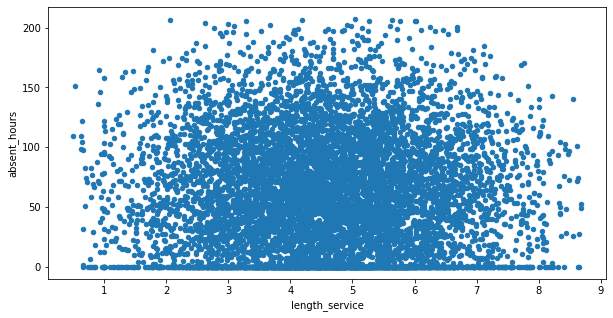

In [ ]:
#memvisualisasikan korelasi variabel 'length_service' dengan 'absent_hours' dalam bentuk scatterplot.

hr_clean[['length_service','absent_hours']].plot(kind='scatter', x='length_service', y='absent_hours', figsize=(10, 5))

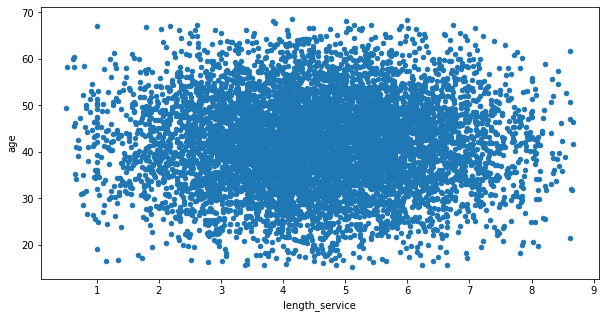

In [ ]:
#memvisualisasikan korelasi variabel 'length_service' dengan 'age' dalam bentuk scatterplot.

hr_clean[['length_service','age']].plot(kind='scatter', x='length_service', y='age', figsize=(10, 5))

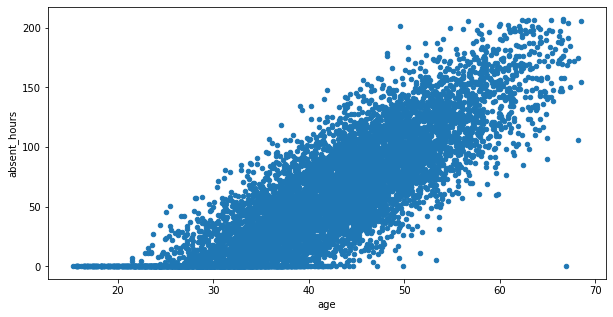

In [ ]:
#memvisualisasikan korelasi variabel 'age' dengan 'absent_hours' dalam bentuk scatterplot.

hr_clean[['age','absent_hours']].plot(kind='scatter', x='age', y='absent_hours', figsize=(10, 5))

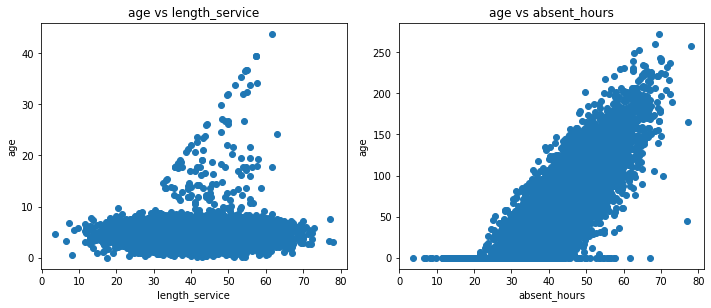

In [ ]:
# visualisasi hubungan antar variabel menggunakan scatter plot
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(hr_filtered['age'],hr_filtered[x])
    plt.title('age vs ' +x)
    plt.ylabel('age')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('length_service', 1)
scatter('absent_hours', 2)

plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0511d1ff10>,
      dtype=object)

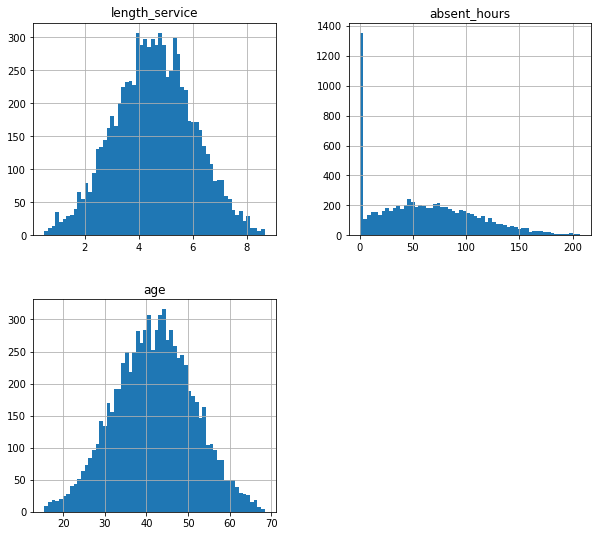

In [ ]:
#Visualisasi dalam bentuk histogram.

hr_clean[['length_service','absent_hours','age']].hist(bins=60, figsize=(10,9))

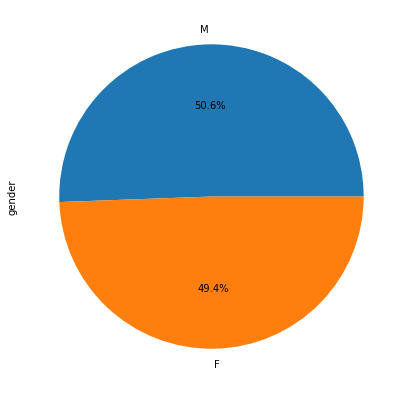

In [ ]:
#presantase tiap kategori
hr['gender'].value_counts().plot(figsize=(7,7),kind='pie', autopct = "%.1f%%")

# Data Modelling


In [ ]:
# Menampilkan data 5 teratas 
hr_clean.head()

,employee,age,length_service,absent_hours,placement
0,Gutierrez,32.028816,6.018478,36.577306,New Orleans LA
1,Hardwick,40.320902,5.532445,30.165072,Charleston SC
2,Delgado,48.822047,4.389973,83.807798,Savannah GA
3,Simon,44.599357,3.081736,70.020165,Chicago IL
4,Delvalle,35.697876,3.619091,0.000000,Los Angeles CA


### Single Variable Regression / Simple Regression Liniear

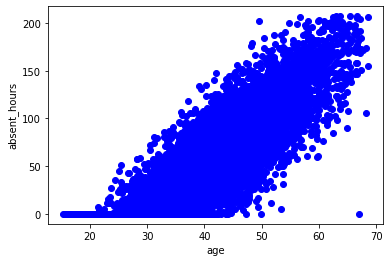

In [ ]:
# Hubungan Variabel Age dengan Absent Hours
plt.xlabel('age')
plt.ylabel('absent_hours')
plt.scatter(hr_clean['age'], hr_clean['absent_hours'], color='blue')

In [ ]:
# menentukan x(independen) dan y(dependen) variable

X = hr_clean['age'].values.reshape((-1,1))
y = hr_clean['absent_hours'].values
reg = linear_model.LinearRegression()
reg.fit(hr_clean[['age']], hr_clean.absent_hours)

LinearRegression()

In [ ]:
# spliting data ke training set dan test set
train_test_split(X,y,test_size=0.2)

[array([[36.17217088],
        [37.58448386],
        [48.52231595],
        ...,
        [51.00873723],
        [36.80508076],
        [36.56530227]]), array([[39.35916646],
        [35.56456214],
        [45.94343505],
        ...,
        [49.76575699],
        [37.48417489],
        [35.87737706]]), array([56.70451388, 47.43704793, 42.99806786, ..., 81.59554037,
        43.02070984, 15.910309  ]), array([23.99443787, 61.14573215, 87.64724179, ..., 86.51479597,
        38.2079108 , 72.24784897])]

In [ ]:
# Data menjadi training dan testing dengan porsi (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=11)

In [ ]:
# Cek shape data training dan testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6461, 1)
(6461,)
(1616, 1)
(1616,)


In [ ]:
# Training Data dan menjalankan model.
reg.fit(X_train,y_train)
reg.predict(X_test)

array([ 56.7851043 , 121.73824457,  54.16069504, ..., 105.39766444,
        43.52307463,  54.31419768])

In [ ]:
# cari tau nilai koefisien dan intercept
reg.coef_
reg.intercept_
print(reg.coef_)
print(reg.intercept_)

[4.17694615]
-114.02497839094292


In [ ]:
# prediksi hasil
y_pred = reg.predict(X_test)

In [ ]:
# cari tau akurasi skor
r2_score(y_test, y_pred)

0.7134767935707966

In [ ]:
# tes prediksi salah satu data, masukan umur 40
reg.predict([[40]])

array([53.05286771])

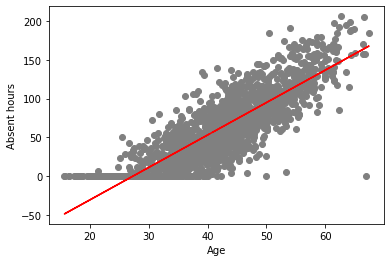

In [ ]:
#visualisasikan variabel age dengan absent hours use y_pred
plt.scatter(X_test, y_test, color ='gray')
plt.plot(X_test, y_pred, 'r', color ='red')
plt.xlabel('Age')
plt.ylabel('Absent hours')
plt.show()

In [ ]:
# Perbedaan nilai actual dan prediksi 
pred_y_hr = pd.DataFrame({'Actual Value':y_test, 'Predicted_Value':y_pred, 'Difference': y_test-y_pred})
pred_y_hr[0:20]

,Actual Value,Predicted_Value,Difference
0,44.711989,56.785104,-12.073116
1,124.246879,121.738245,2.508634
2,85.604662,54.160695,31.443967
3,20.356749,4.721250,15.635499
4,0.000000,0.587623,-0.587623
5,0.000000,-12.235038,12.235038
6,58.008243,32.839172,25.169071
7,59.016582,51.736443,7.280139
8,82.647573,73.090532,9.557041
9,100.465819,72.112771,28.353048


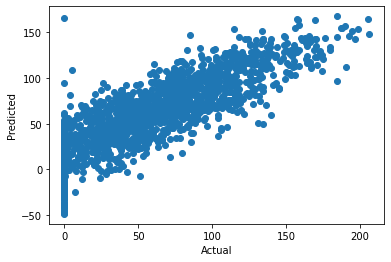

In [ ]:
# visualisasikan perbandingan nilai actual dan predicted
plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

### Metrics

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 score:', r2_score(y_test,y_pred))

Mean Absolute Error: 19.74489939575669
Mean Squared Error: 633.4280294819248
Root Mean Squared Error: 25.16799613560692
R2 score: 0.7134767935707966


### KESIMPULAN
R-Squared = 0.713 Adj R-Squared = 0.713 ~ 71% varians dapat dijelaskan